<img src="images/DBSCAN.png" alt="drawing" width="1000"/>

# **DBSCAN - Density Based Spatial Clustering of Application with Noise**

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN

In [135]:
blobs = pd.read_csv("data/cluster_blobs.csv")
moons = pd.read_csv("data/cluster_moons.csv")
circles = pd.read_csv("data/cluster_circles.csv")

## DBSCAN vs K Means Clustering

In [136]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    plt.figure(figsize=(8, 5), dpi=120)
    sns.scatterplot(data, x='X1', y='X2', hue=labels, palette='Set1')
    plt.show()

### K Means Clustering
This algorithm is great at identifying well well seperated and uniformly distributed clusters, but struggles with more complex shapes. 

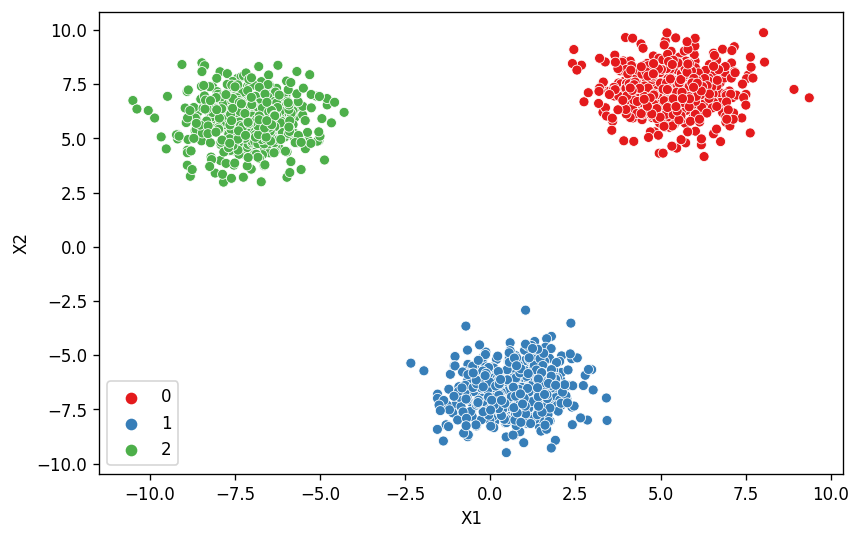

In [137]:
display_categories(model=KMeans(n_clusters=3, n_init='auto'), data=blobs)

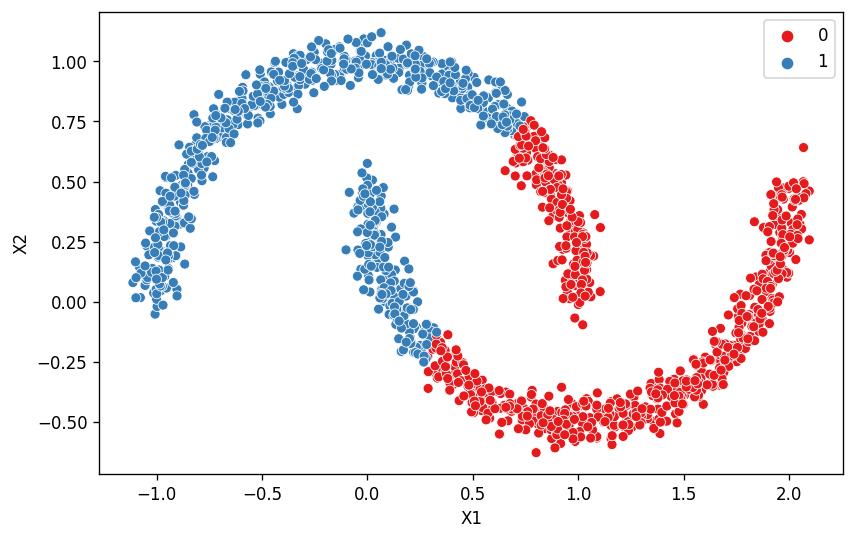

In [138]:
display_categories(model=KMeans(n_clusters=2, n_init='auto'), data=moons)

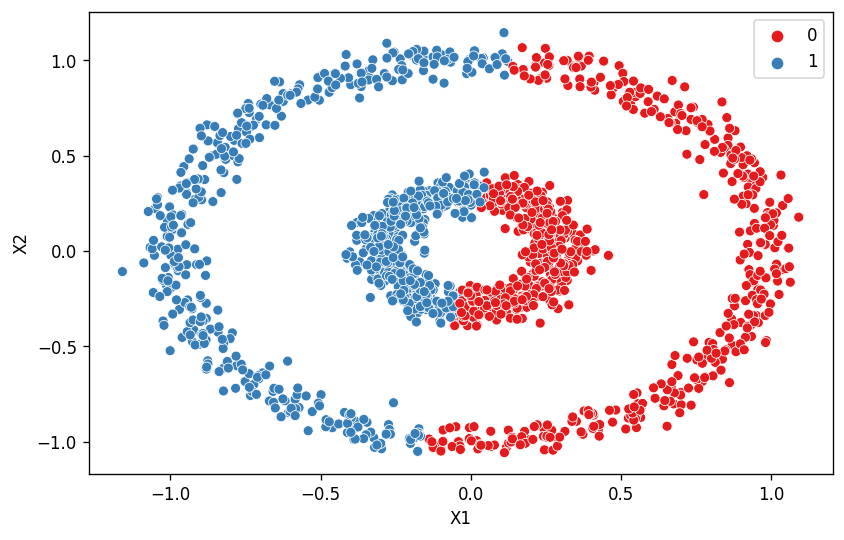

In [139]:
display_categories(model=KMeans(n_clusters=2, n_init='auto'), data=circles)

### DBSCAN 

This algorithm is great at identifying more complex shapes, but struggles when the data points have a large/wide distribution.

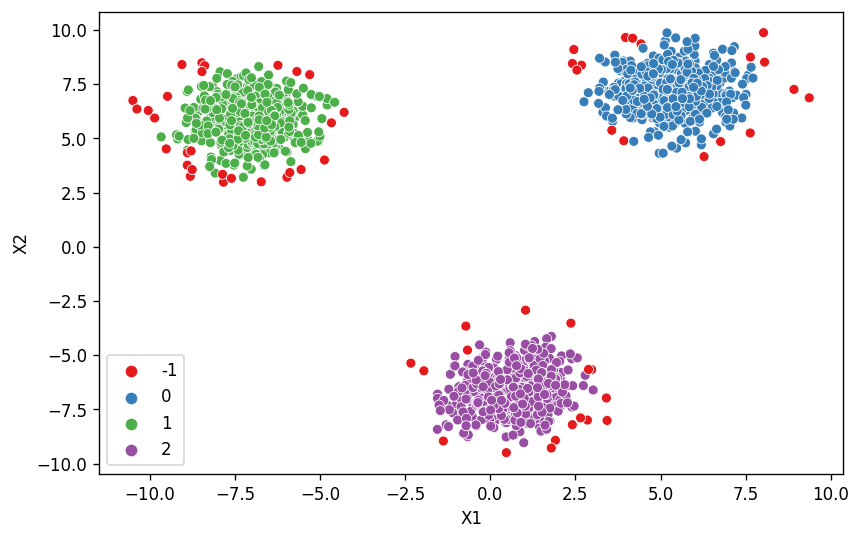

In [140]:
display_categories(model=DBSCAN(), data=blobs)

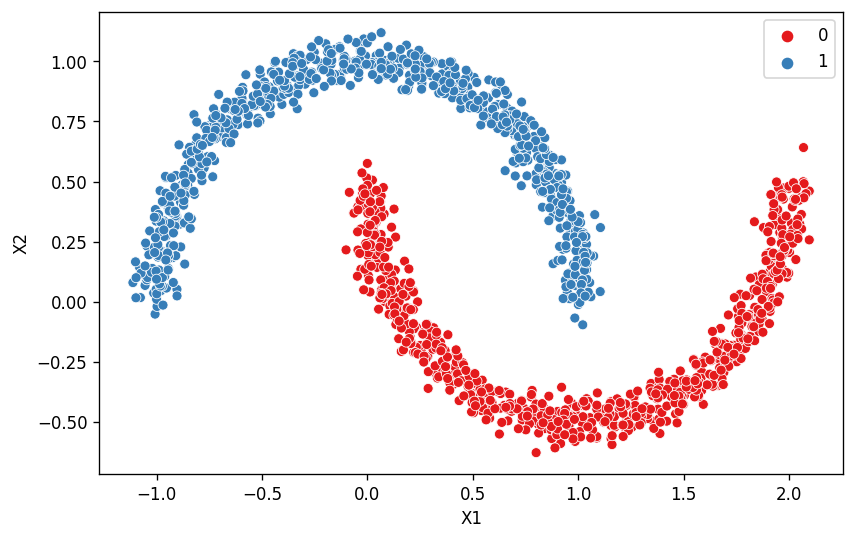

In [141]:
display_categories(model=DBSCAN(eps=0.15), data=moons)

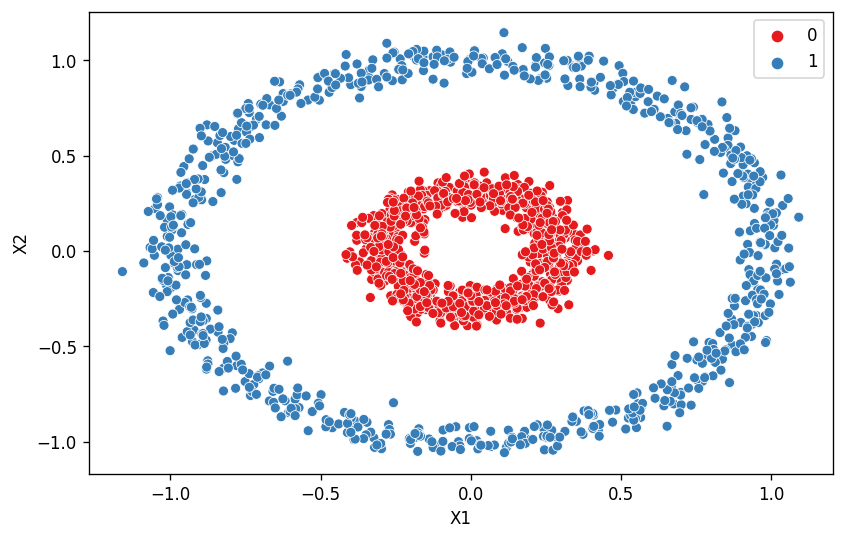

In [142]:
display_categories(model=DBSCAN(eps=0.15), data=circles)

## Hyperparameter Tuning

In DBSCAN hyperparameter tuning is important to correctly group the data points and identify outliers

In [143]:
two_blobs_outliers = pd.read_csv("data/cluster_two_blobs_outliers.csv")

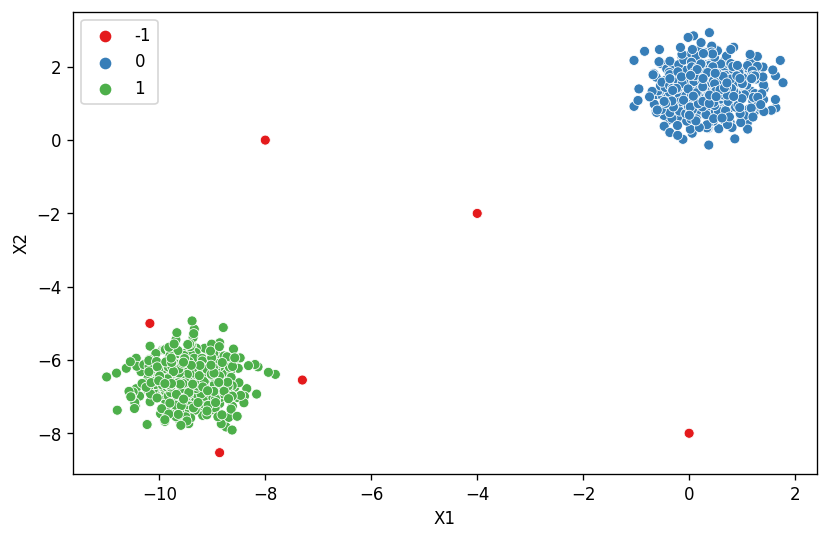

In [145]:
display_categories(model=DBSCAN(), data=two_blobs_outliers)

### $\epsilon$ Value

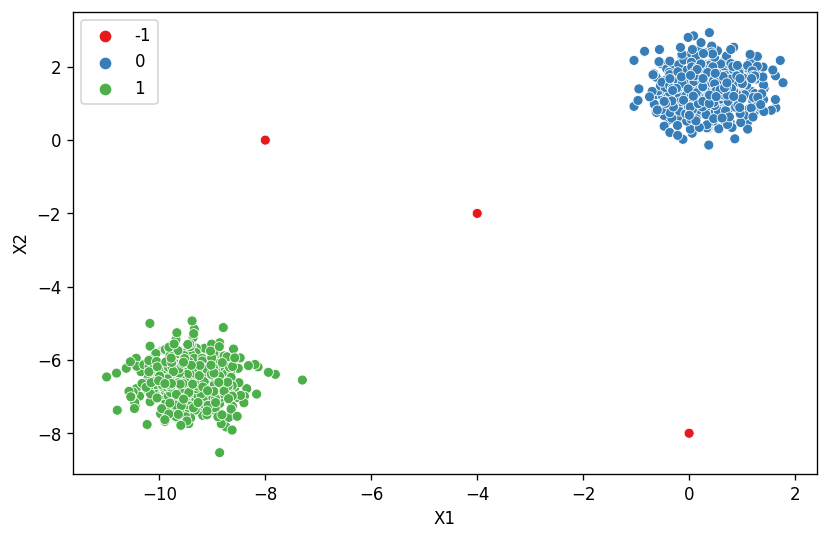

In [146]:
model = DBSCAN(eps=1)
display_categories(model, data=two_blobs_outliers)

In [147]:
n_outliers = np.sum(model.labels_ == -1)
outlier_percentage = 100 * n_outliers/len(model.labels_)

In [148]:
n = []
p = []
c = []


In [149]:
eps_values = np.linspace(0.001, 2, 100)
for eps in eps_values:
    model = DBSCAN(eps=eps)
    model.fit(two_blobs_outliers)
    
    n_outliers = np.sum(model.labels_ == -1)
    outlier_percentage = 100 * n_outliers/len(model.labels_)
    n_clusters = len(np.unique(model.labels_))
    
    n.append(n_outliers)
    p.append(outlier_percentage)
    c.append(n_clusters)

In this case a good value for $\epsilon$ might be 0.75

(0.0, 10.0)

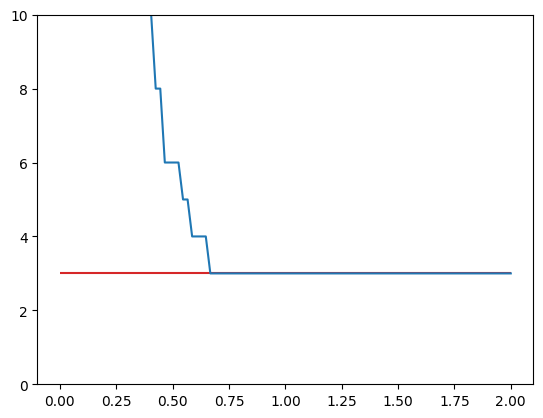

In [154]:
plt.hlines(y=3, xmin=0, xmax=2, color='tab:red')
sns.lineplot(x=eps_values, y=n)
plt.ylim(0, 10)


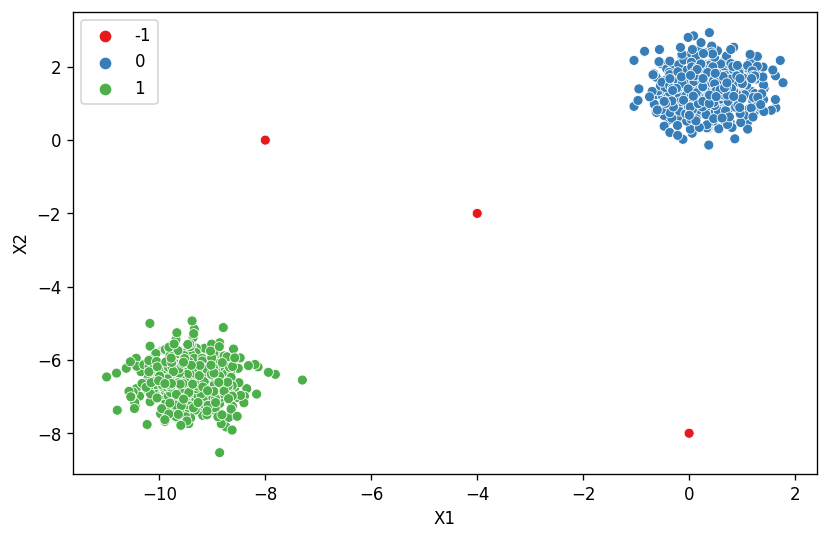

In [155]:
display_categories(DBSCAN(eps=0.75), data=two_blobs_outliers)

### n_min Value

In [161]:
n = []
p = []
c = []


n_min_values = np.arange(1, 100)
for n_min in n_min_values:
    model = DBSCAN(min_samples=n_min)
    model.fit(two_blobs_outliers)
    
    n_outliers = np.sum(model.labels_ == -1)
    outlier_percentage = 100 * n_outliers/len(model.labels_)
    n_clusters = len(np.unique(model.labels_))
    
    n.append(n_outliers)
    p.append(outlier_percentage)
    c.append(n_clusters)

<Axes: >

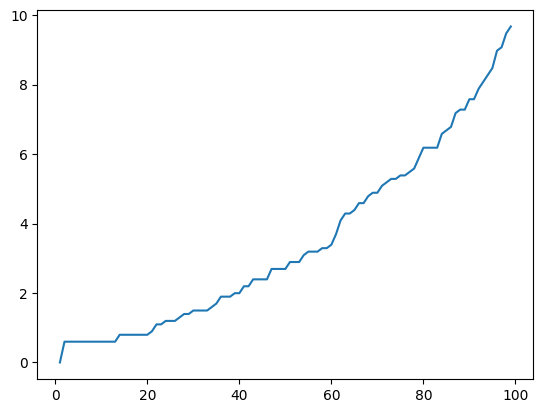

In [162]:
sns.lineplot(x=n_min_values, y=p)

**Rule of Thumb:**  
A good initial value for the minimum number of samples required to for a point to be a core point is twice the number of dimensions (columns/features) of the dataset.

`min_samples = 2 * n_dimensions` 

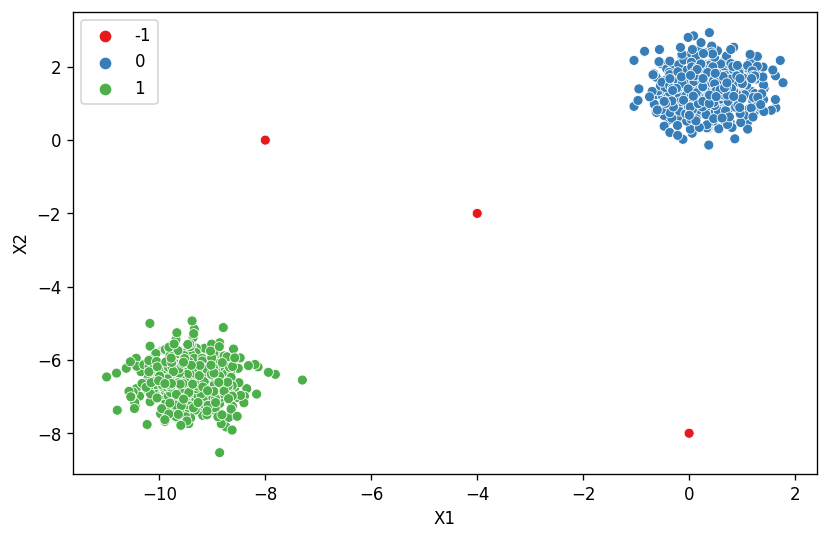

In [164]:
n_dimensions = two_blobs_outliers.shape[1]
display_categories(DBSCAN(eps=0.75, min_samples=2*n_dimensions), two_blobs_outliers)

**Single-Point Clusters**  
Set `min_samples = 1` if you want to consider single-point clusters instead of outliers, though this will not often be the case. 

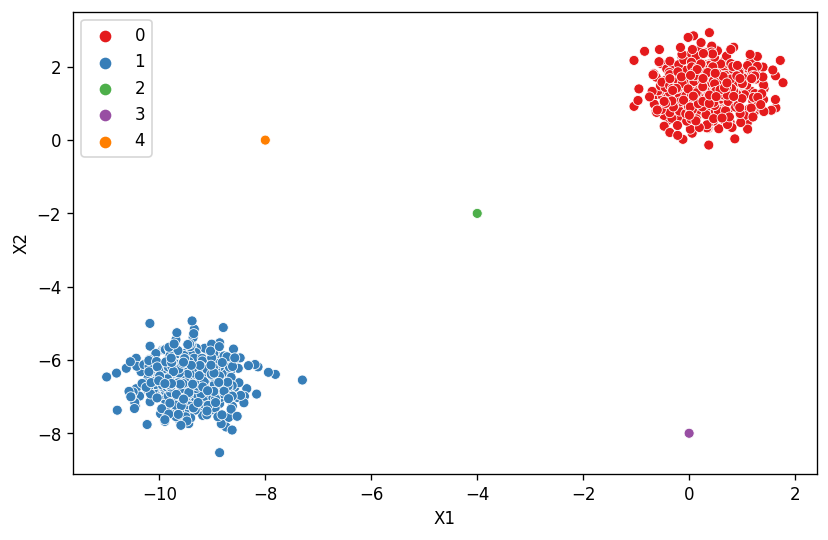

In [163]:
display_categories(DBSCAN(eps=0.75, min_samples=1), data=two_blobs_outliers)
